<a href="https://colab.research.google.com/github/TW-ZiJieLin/FiniteDifference/blob/main/Finite_Difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import

In [1]:
import matplotlib.pyplot as plt

### ForwardDifference

In [2]:
def ForwardDifference( x, y = None, neighbor = 2 ):
  if y: #for 2 inputs
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return 0
    y_diff = [ ( y[i+neighbor] - y[i] )/( x[i+neighbor] - x[i] ) for i in range(len(y)-neighbor) ]
    y_diff = y_diff + [ y_diff[-1] for i in range(neighbor) ]
    return y_diff
  else: #for 1 input
    x_diff = [ ( x[i+neighbor] - x[i] )/neighbor for i in range(len(x)-neighbor) ]
    x_diff = x_diff + [ x_diff[-1] for i in range(neighbor) ]
    return x_diff

### Central Difference

In [3]:
def CentralDifference( x, y = None, neighbor = 2 ):
  if y: #for 2 inputs
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return
    y_diff = [ ( y[i+2*neighbor] - y[i] )/( x[i+2*neighbor] - x[i] ) for i in range(len(y)-2*neighbor) ]
    y_diff = [ ( y[i+neighbor] - y[0] )/( x[i+neighbor] - x[0] ) for i in range(neighbor)] + y_diff +\
        [ ( y[-1] - y[-2*neighbor+i] )/( x[-1] - x[-2*neighbor+i] ) for i in range(neighbor)]
    return y_diff
  else: #for 1 input
    x_diff = [ ( x[i+2*neighbor] - x[i] )/(2*neighbor) for i in range(len(x)-2*neighbor) ]
    x_diff = [ ( x[i+neighbor] - x[0] )/(i+neighbor) for i in range(neighbor)] + x_diff +\
        [ ( x[-1] - x[-2*neighbor+i] )/( 2*neighbor-i-1 ) for i in range(neighbor)]
    return x_diff

### Backward Difference

In [4]:
def BackwardDifference( x, y = None, neighbor = 2 ):
  if y: #for 2 inputs
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return
    y_diff = [ ( y[i+neighbor] - y[i] )/( x[i+neighbor] - x[i] ) for i in range(len(y)-neighbor) ]
    y_diff = [ y_diff[0] for i in range(neighbor) ] + y_diff
    return y_diff
  else: #for 1 input
    x_diff = [ ( x[i+neighbor] - x[i] )/neighbor for i in range(len(x)-neighbor) ]
    x_diff = [ x_diff[0] for i in range(neighbor) ] + x_diff
    return x_diff

### Function

In [5]:
def FunctionDiff0(x): #the function
  return 3*x**4-x**3+x**2

def FunctionDiff1(x): #first-order differentiation of the function
  return 12*x**3-3*x**2+2*x

def FunctionDiff2(x): #second-order differentiation of the function
  return 36*x**2-6*x

### Analytic differentiation

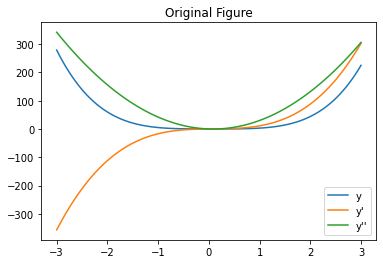

In [6]:
#generating x from -3 to 3
Points = 101
begin = -3
end = 3
x = [ begin+(end-begin)*i/(Points-1) for i in range(Points) ]

#generating y & derivative of y
y_diff0 = [ FunctionDiff0(x[i]) for i in range(Points) ]
y_diff1 = [ FunctionDiff1(x[i]) for i in range(Points) ]
y_diff2 = [ FunctionDiff2(x[i]) for i in range(Points) ]

#show analytic function
plt.plot( x,y_diff0, x,y_diff1, x,y_diff2 )
plt.title("Original Figure")
plt.legend(["y","y'","y''"])
plt.show()

### Numerical differentiation

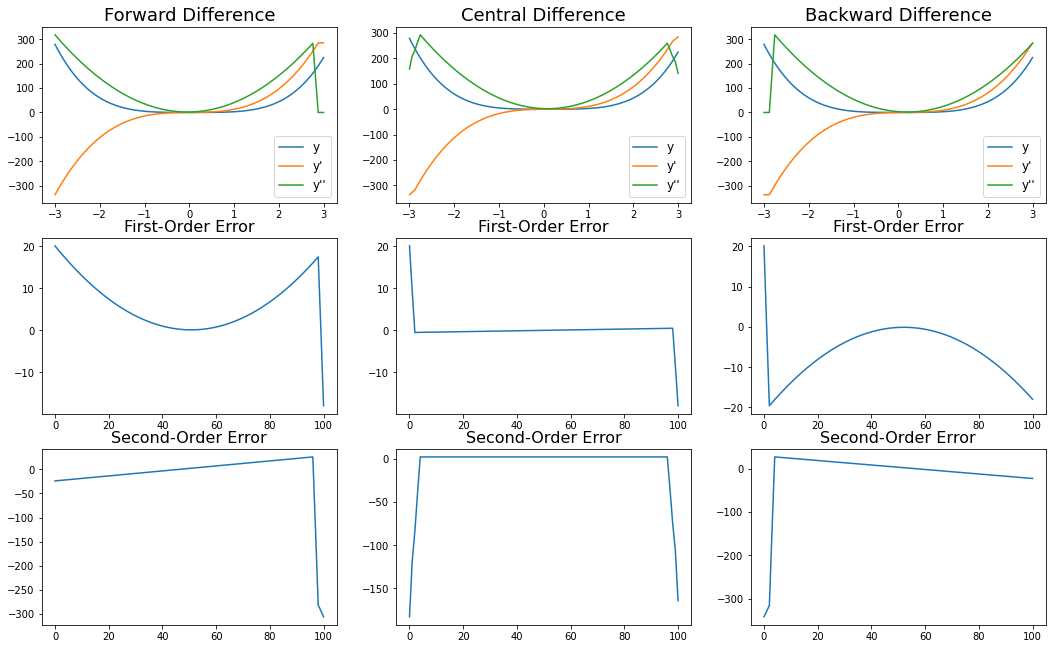

In [10]:
fig,axes=plt.subplots(3,3,figsize=(18,11))

##for 2 inputs case
F_y_diff1 = ForwardDifference( x,y_diff0 )
F_y_diff2 = ForwardDifference( x,F_y_diff1 )
C_y_diff1 = CentralDifference( x,y_diff0 )
C_y_diff2 = CentralDifference( x,C_y_diff1 )
B_y_diff1 = BackwardDifference( x,y_diff0 )
B_y_diff2 = BackwardDifference( x,B_y_diff1 )

##for 1 input case
# step = x[1]-x[0]
# F_y_diff1 = ForwardDifference([ i/step for i in y_diff0 ])
# F_y_diff2 = ForwardDifference([ i/step for i in F_y_diff1 ])
# C_y_diff1 = CentralDifference([ i/step for i in y_diff0 ])
# C_y_diff2 = CentralDifference([ i/step for i in C_y_diff1 ])
# B_y_diff1 = BackwardDifference([ i/step for i in y_diff0 ])
# B_y_diff2 = BackwardDifference([ i/step for i in B_y_diff1 ])

#calculating error between analytic and numerical results
F_First_Error = [ F_y_diff1[i]-y_diff1[i] for i in range(len(y_diff0))]
C_First_Error = [ C_y_diff1[i]-y_diff1[i] for i in range(len(y_diff0))]
B_First_Error = [ B_y_diff1[i]-y_diff1[i] for i in range(len(y_diff0))]
F_Second_Error = [ F_y_diff2[i]-y_diff2[i] for i in range(len(y_diff0))]
C_Second_Error = [ C_y_diff2[i]-y_diff2[i] for i in range(len(y_diff0))]
B_Second_Error = [ B_y_diff2[i]-y_diff2[i] for i in range(len(y_diff0))]

#figure of forward finite difference
axes[0,0].plot( x,y_diff0, x,F_y_diff1, x,F_y_diff2 )
axes[1,0].plot( F_First_Error )
axes[2,0].plot( F_Second_Error )

#figure of central finite difference
axes[0,1].plot( x,y_diff0, x,C_y_diff1, x,C_y_diff2 )
axes[1,1].plot( C_First_Error )
axes[2,1].plot( C_Second_Error )

#figure of backward finite difference
axes[0,2].plot( x,y_diff0, x,B_y_diff1, x,B_y_diff2 )
axes[1,2].plot( B_First_Error )
axes[2,2].plot( B_Second_Error )

#set titles and legends
axes[0,0].set_title("Forward Difference",fontsize=18)
axes[0,1].set_title("Central Difference",fontsize=18)
axes[0,2].set_title("Backward Difference",fontsize=18)
for i in range(3):
  axes[0,i].legend(["y","y'","y''"],fontsize=12)
  axes[1,i].set_title("First-Order Error",fontsize=16)
  axes[2,i].set_title("Second-Order Error",fontsize=16)
plt.show()